## Data Cleaning and EDA for Hotel Booking Dataset

### Imports and Data Loading

#### Imports

In [10]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from pyspark.sql import SparkSession

#### Spark Initialization

In [4]:
# remove any old spark vars remaining
os.environ.pop("SPARK_MASTER", None)
os.environ["PYSPARK_SUBMIT_ARGS"] = "--master local[*] pyspark-shell"

# stop spark sessions remaining
try:
    from pyspark.sql import SparkSession
    spark = SparkSession.getActiveSession()
    if spark is not None:
        spark.stop()
except Exception as e:
    print("No active Spark session found.")

In [ ]:
# new spark session that runs locally
spark = (
    SparkSession.builder
    .appName("HotelBookingDataCleaning")
    .master("local[*]")
    .config("spark.driver.host", "127.0.0.1")
    .config("spark.driver.bindAddress", "127.0.0.1")
    .getOrCreate()
)

#### Data Reading and Schema Viewing

In [6]:
hotel_booking = spark.read.csv('datasets/hotel-booking.csv', header=True, inferSchema=True)

In [7]:
hotel_booking.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- booking_status: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- country: string (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- email: string (nullable = true)



### EDA

#### Hotel Column

In [ ]:
hotel_counts = hotel_booking.groupBy("hotel").count()
hotel_counts.show()

+------------+-----+
|       hotel|count|
+------------+-----+
|  City Hotel|51822|
|Resort Hotel|26881|
+------------+-----+



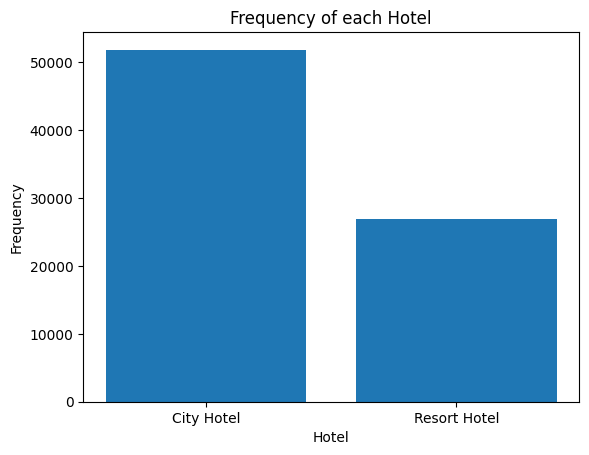

In [14]:
hotel_counts_pd = hotel_counts.toPandas()

plt.bar(hotel_counts_pd["hotel"], hotel_counts_pd["count"])
plt.xlabel("Hotel")
plt.ylabel("Frequency")
plt.title("Frequency of each Hotel")
plt.show()

#### Booking Status Column

#### Lead Time Column

#### Arrival Date Columns

#### Weekday and Weekend Staying Columns

#### Market Segment Type Column

#### Country Column

#### Average Price Column

### Conclusion

In [19]:
spark.stop()